# fix-restarts-dec-2018

Fix restart files that have had the landmask enlarged. 
**Does not fix points where land has been changed to ocean.**

Use this in conjunction with bathymetry-closeup-baffin.ipynb

See https://github.com/OceansAus/access-om2/issues/99#issuecomment-396773493 and http://cosima.org.au/index.php/2018/06/12/technical-working-group-meeting-june-2018/


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# Eliminate margins
# from https://stackoverflow.com/questions/44298864/how-can-i-eliminate-the-gray-border-around-jupyter-ipython-notebooks-in-my-brows
from IPython.core.display import display, HTML
display(HTML("<style>"
    + "#notebook { padding-top:0px !important; } " 
    + ".container { width:100% !important; } "
    + ".end_space { min-height:0px !important; } "
    + "</style>"))

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import netCDF4 as nc
import IPython.display
import shutil

In [4]:
# see https://github.com/OceansAus/access-om2/issues/99
badbathyfile   = '/g/data3/hh5/tmp/cosima/bathymetry/topog_12_10_17_yenesei.nc'
# fixedbathyfile = '/g/data3/hh5/tmp/cosima/bathymetry/topog_12_06_2018.baffin.nc'
fixedbathyfile = '/g/data3/hh5/tmp/cosima/bathymetry/topog_13_06_2018.baffin.nc'


baddepth = nc.Dataset(badbathyfile).variables['depth'][:,:]
depth = nc.Dataset(fixedbathyfile).variables['depth'][:,:]

In [5]:
maskdiff = np.logical_and(np.ma.getmask(depth), np.logical_not(np.ma.getmask(baddepth)))  # where land mask has increased
# maskdiff = np.ma.getmask(depth).astype(int)-np.ma.getmask(baddepth).astype(int)
# maskdiff[maskdiff<0] = 0  # don't consider reductions in land mask

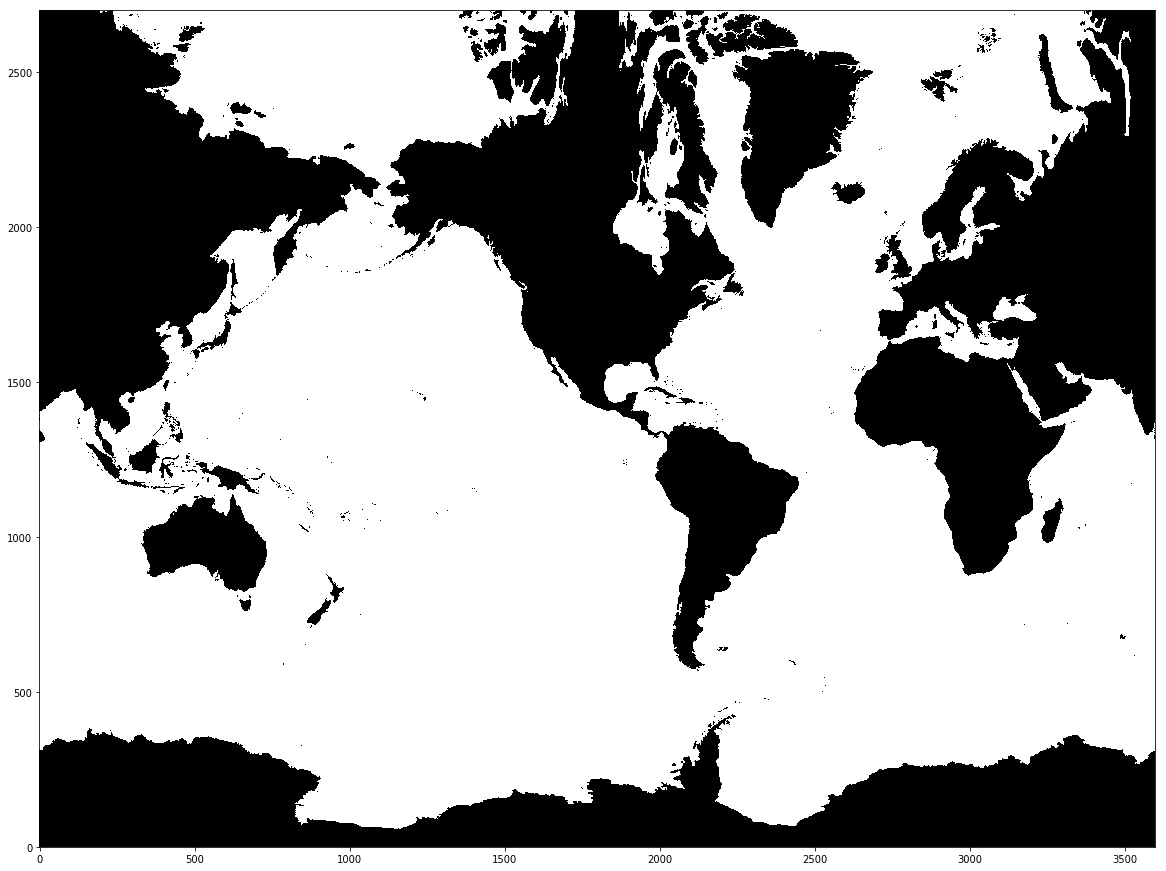

In [6]:
plt.figure(figsize=(20,20))
plt.imshow(np.ma.getmask(depth), origin='lower', cmap=cm.binary)

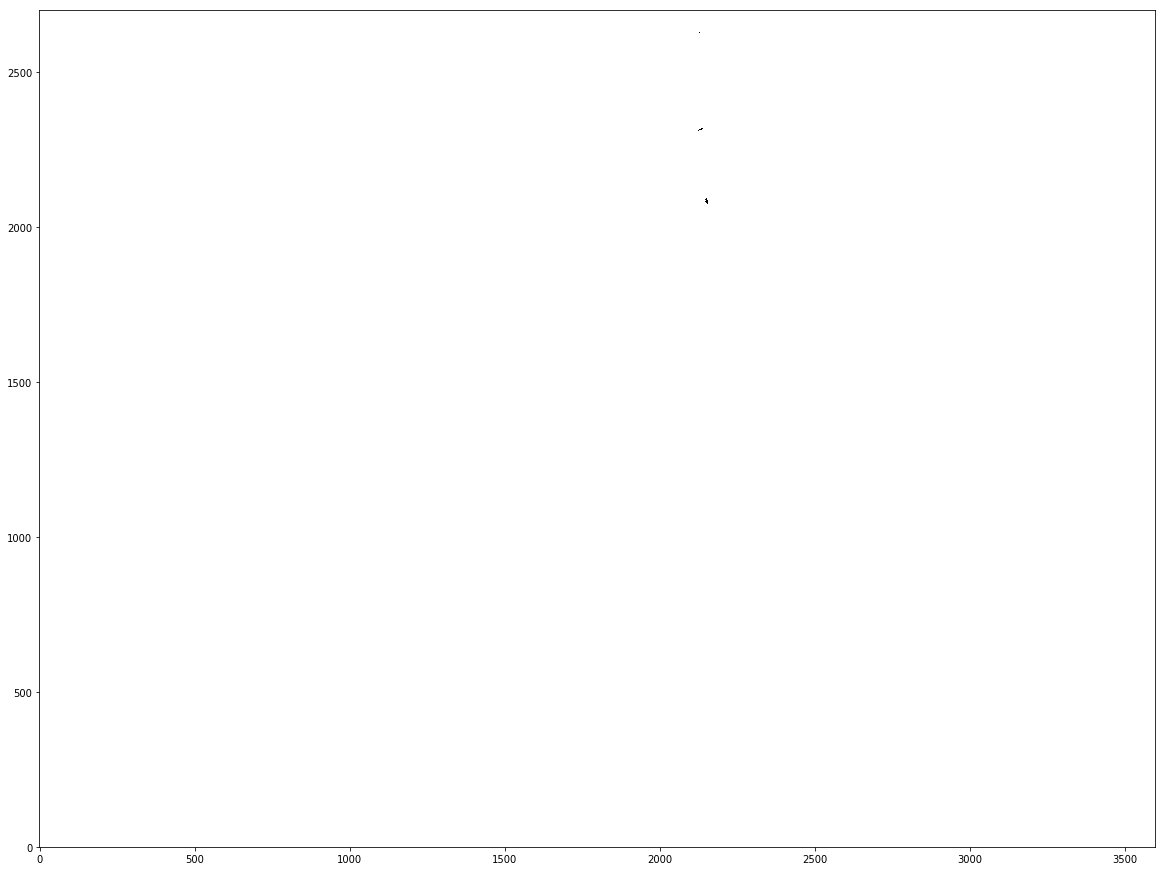

In [7]:
plt.figure(figsize=(20,20))
plt.imshow(maskdiff, origin='lower', cmap=cm.binary)

## fix MOM land mask
See https://arccss.slack.com/archives/C9Q7Y1400/p1529628634000032 
Get file with
```
cd github/aekiss/notebooks
scp -rp aek156@r-dm.nci.org.au:/short/v45/aek156/access-om2/input/mom_01deg/ocean_mask.nc .
```

In [8]:
maskin = 'ocean_mask.nc'
maskout = maskin+'-fixed'
shutil.copy2(maskin, maskout)  # overwrites previous maskout (if any)

'ocean_mask.nc-fixed'

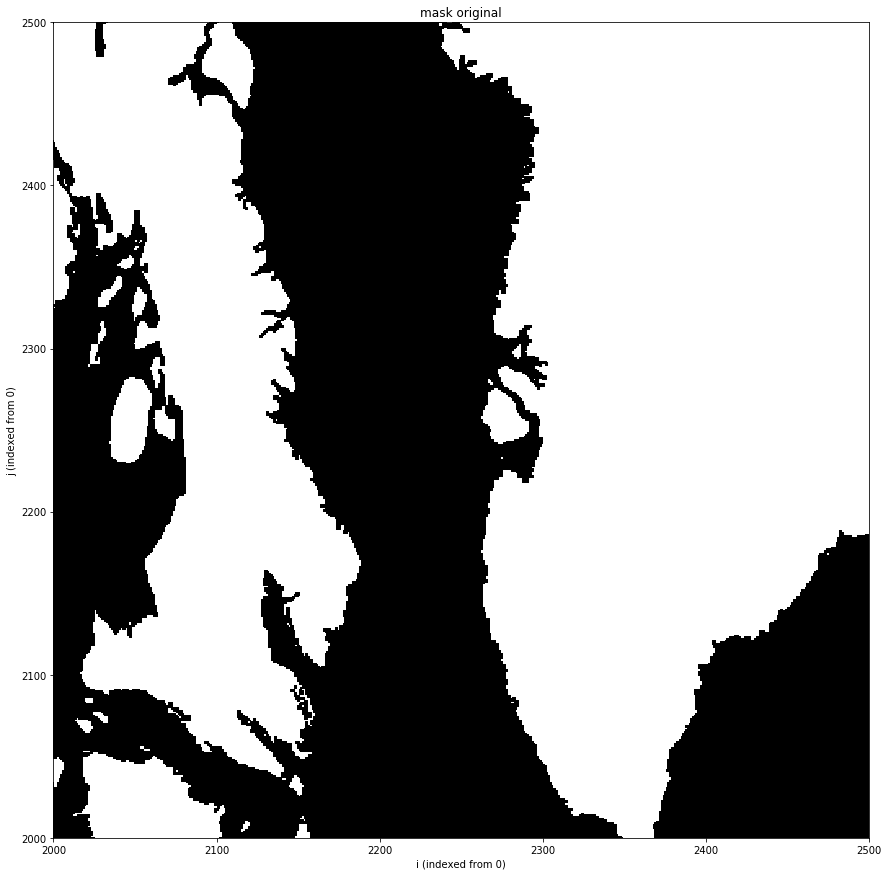

In [9]:
v = 'mask'
dset = nc.Dataset(maskout,'r')
plt.figure(figsize=(15,15))
plt.imshow(dset[v], origin='lower', cmap=cm.binary)
plt.xlim(2000,2500)
plt.ylim(2000,2500)
plt.title(v+' original')
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');
dset.close()

In [10]:
# alter mask in maskout
v = 'mask'
dset = nc.Dataset(maskout,'r+')
f = dset[v][:]
f[maskdiff] = 0.0  # 0 is land
dset[v][:] = f
dset.close()  # write modified variable to maskout

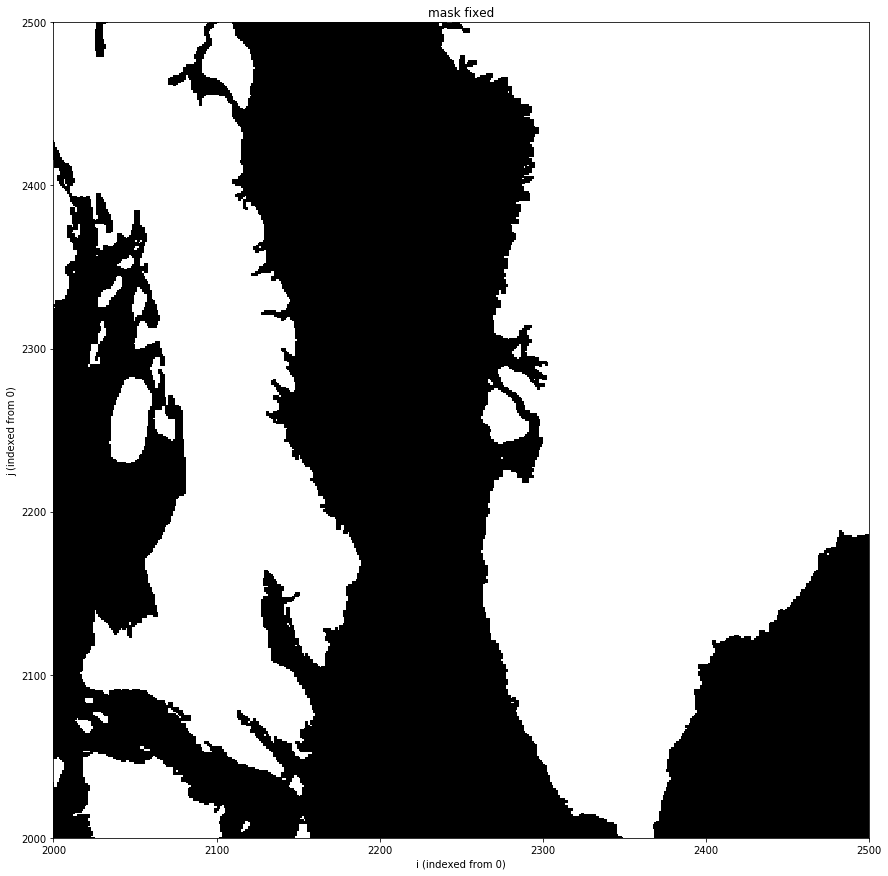

In [12]:
v = 'mask'
dset = nc.Dataset(maskout,'r')
plt.figure(figsize=(15,15))
plt.imshow(dset[v], origin='lower', cmap=cm.binary)
plt.xlim(2000,2500)
plt.ylim(2000,2500)
plt.title(v+' fixed')
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');
dset.close()

Upload file with
```
scp -rp ./ocean_mask.nc-fixed aek156@r-dm.nci.org.au:/short/v45/aek156/access-om2/input/mom_01deg/
```

## fix CICE restarts

### iced

In [10]:
cicerestartin = '/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_spinup6/restart387/ice/iced.0036-01-01-00000.nc'
cicerestartout = cicerestartin+'-fixed'
shutil.copy2(cicerestartin, cicerestartout)  # overwrites previous cicerestartout (if any)

'/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_spinup6/restart387/ice/iced.0036-01-01-00000.nc-fixed'

uvel (2700, 3600)
vvel (2700, 3600)
scale_factor (2700, 3600)
swvdr (2700, 3600)
swvdf (2700, 3600)
swidr (2700, 3600)
swidf (2700, 3600)
strocnxT (2700, 3600)
strocnyT (2700, 3600)
stressp_1 (2700, 3600)
stressp_2 (2700, 3600)
stressp_3 (2700, 3600)
stressp_4 (2700, 3600)
stressm_1 (2700, 3600)
stressm_2 (2700, 3600)
stressm_3 (2700, 3600)
stressm_4 (2700, 3600)
stress12_1 (2700, 3600)
stress12_2 (2700, 3600)
stress12_3 (2700, 3600)
stress12_4 (2700, 3600)


/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


iceumask (2700, 3600)
aicen (5, 2700, 3600)
vicen (5, 2700, 3600)
vsnon (5, 2700, 3600)
Tsfcn (5, 2700, 3600)
sice001 (5, 2700, 3600)
qice001 (5, 2700, 3600)
sice002 (5, 2700, 3600)
qice002 (5, 2700, 3600)
sice003 (5, 2700, 3600)
qice003 (5, 2700, 3600)
sice004 (5, 2700, 3600)
qice004 (5, 2700, 3600)
qsno001 (5, 2700, 3600)


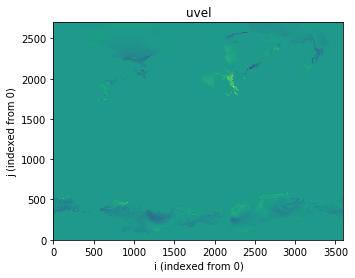

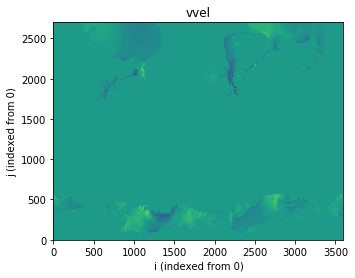

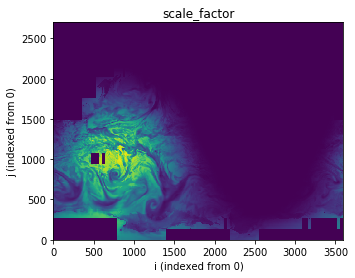

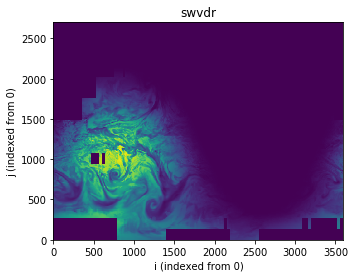

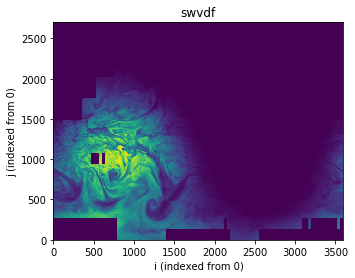

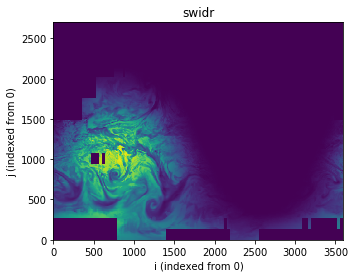

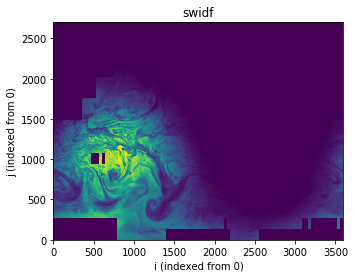

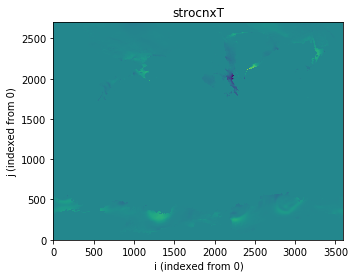

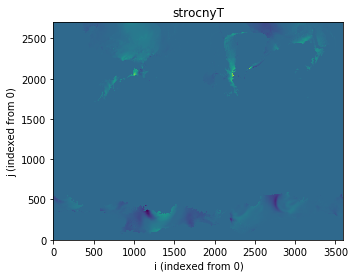

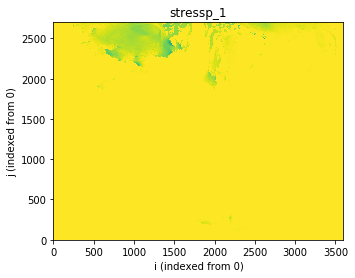

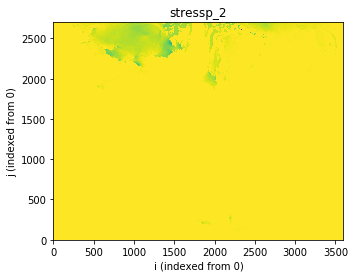

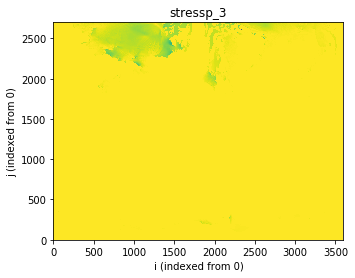

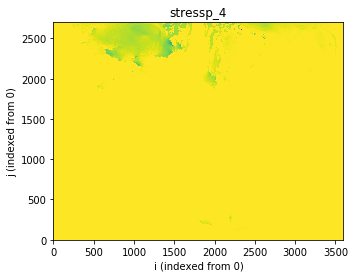

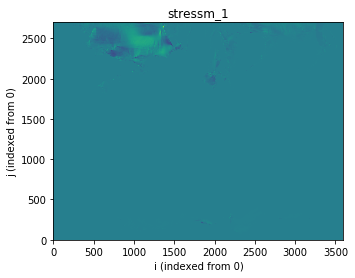

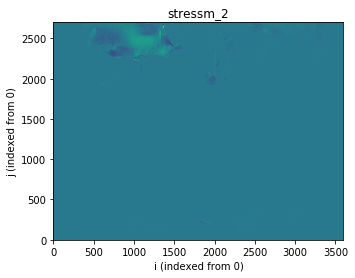

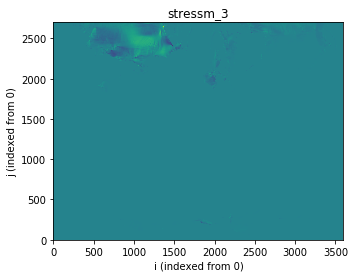

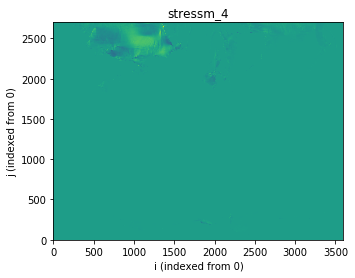

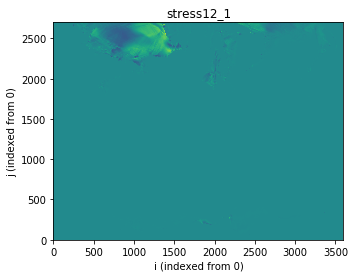

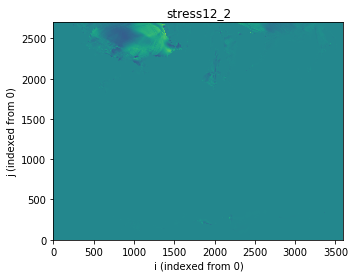

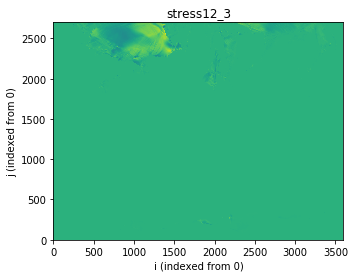

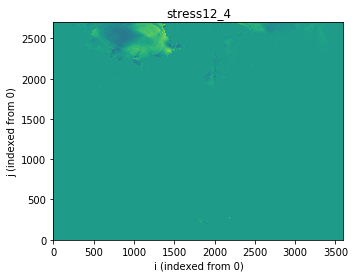

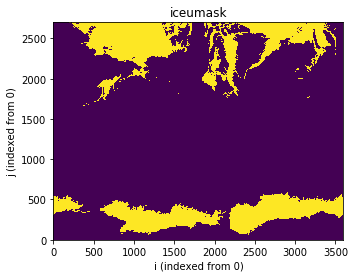

In [11]:
dset = nc.Dataset(cicerestartout,'r')
for v in dset.variables.keys():
    print(v, np.shape(dset[v]))
    if len(np.shape(dset[v]))==2:
        plt.figure() #(figsize=(10,10))
        plt.imshow(dset[v], origin='lower')
        plt.title(v)
        plt.xlabel('i (indexed from 0)')
        plt.ylabel('j (indexed from 0)');

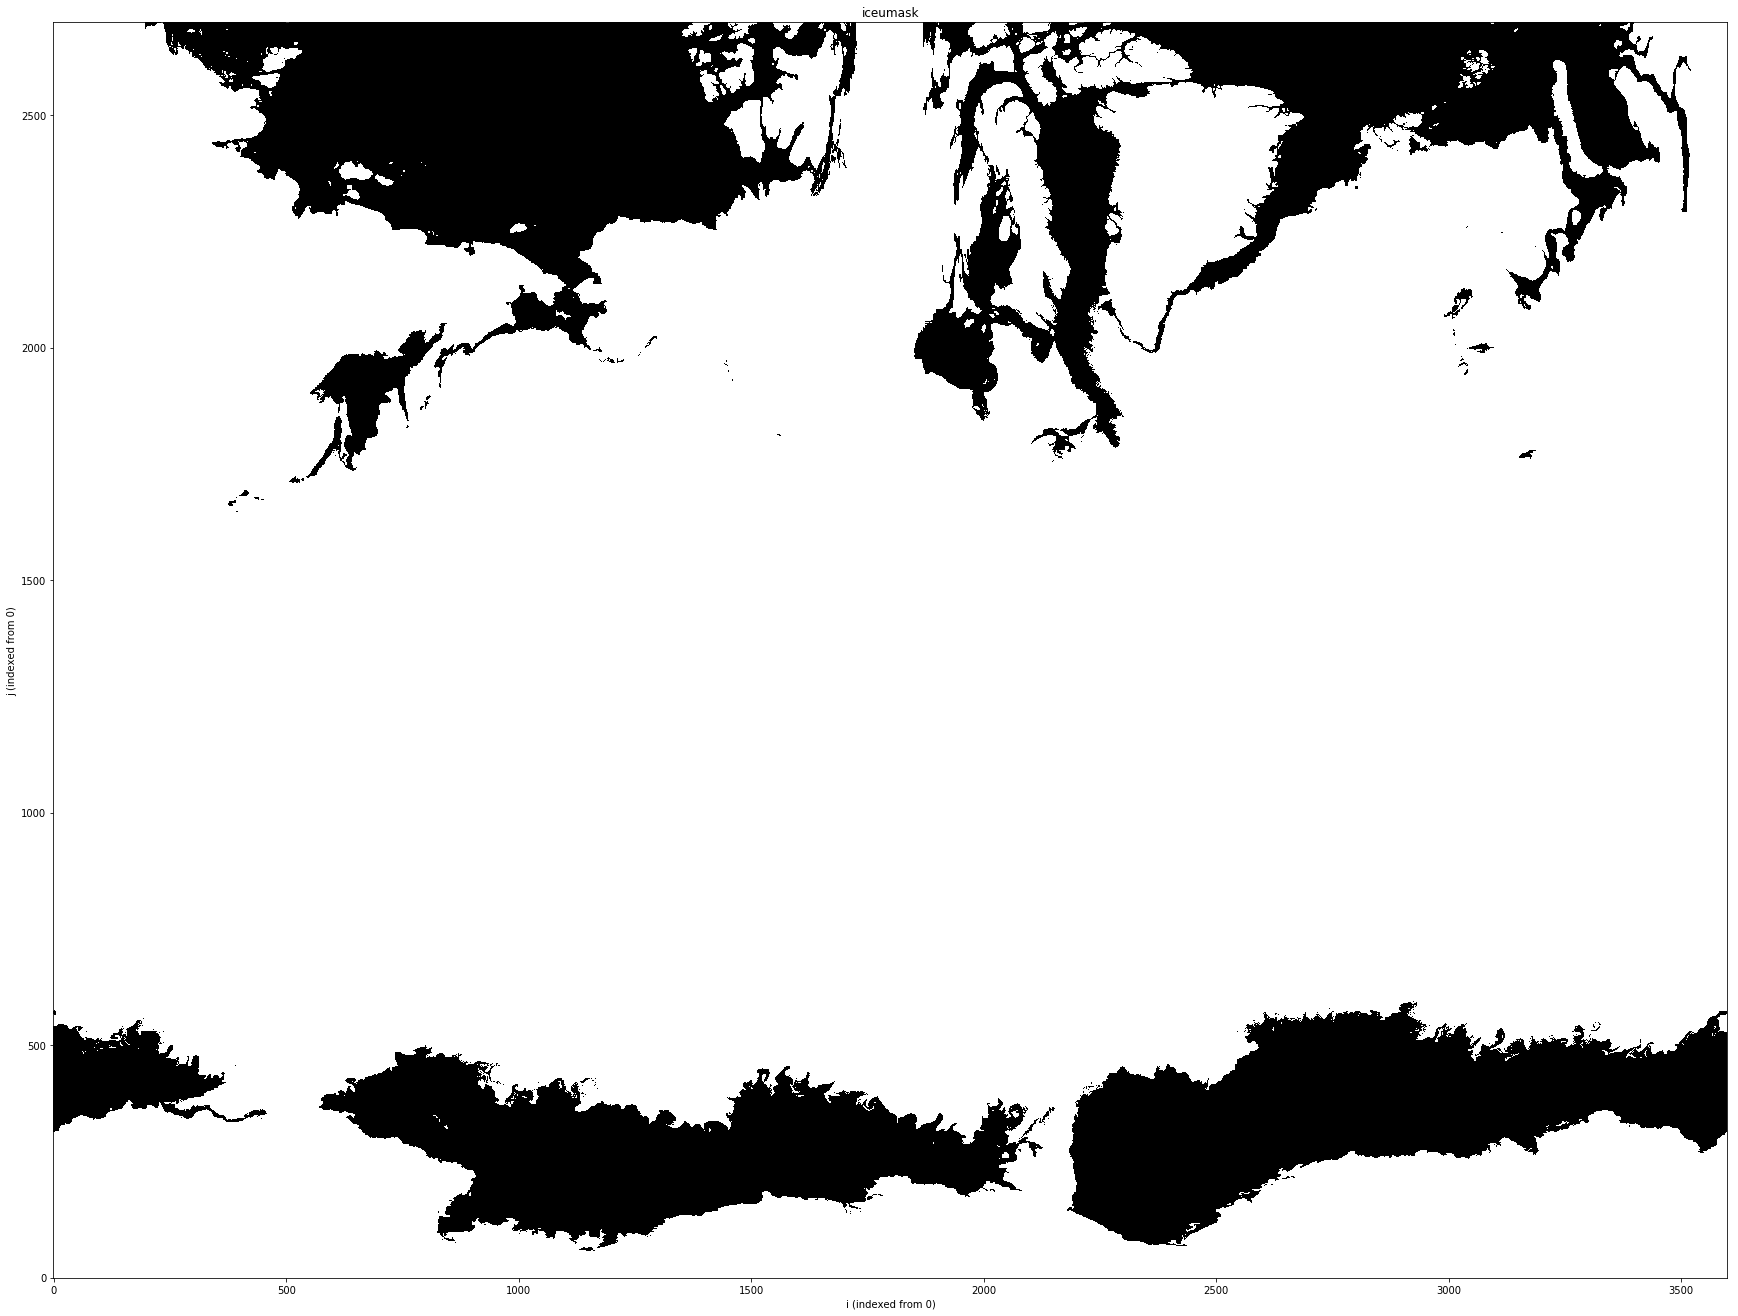

In [12]:
v = 'iceumask'
plt.figure(figsize=(30,30))
plt.imshow(dset[v], origin='lower', cmap=cm.binary)
plt.title(v)
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');

In [13]:
dset.close()

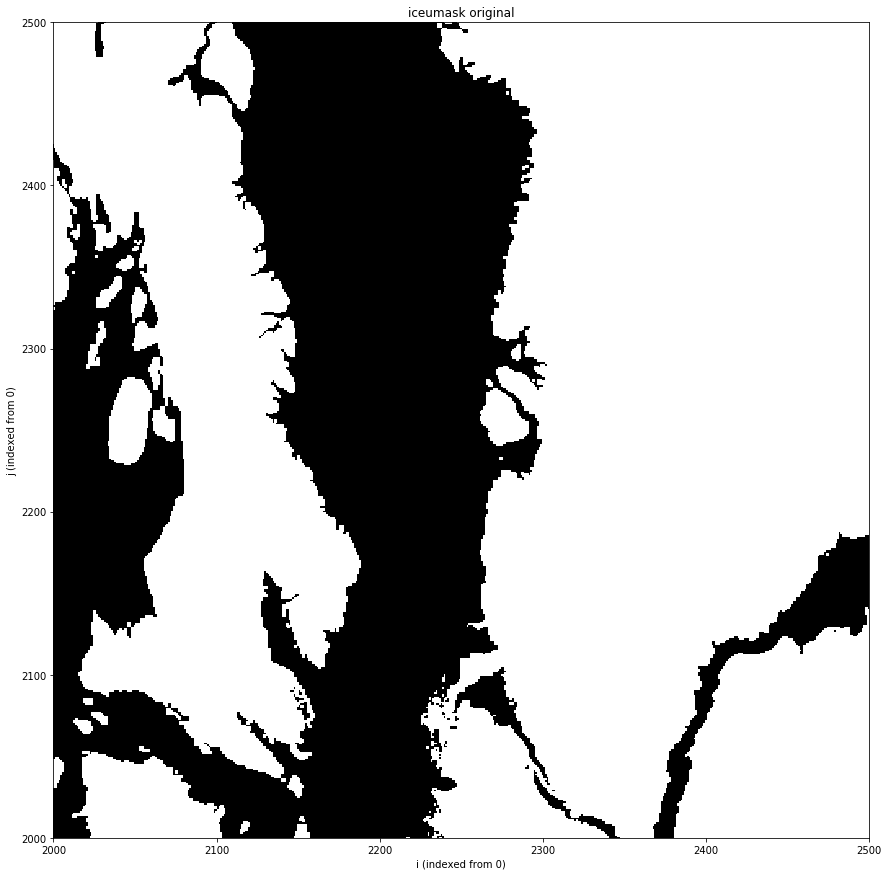

In [14]:
v = 'iceumask'
dset = nc.Dataset(cicerestartout,'r')
plt.figure(figsize=(15,15))
plt.imshow(dset[v], origin='lower', cmap=cm.binary)
plt.xlim(2000,2500)
plt.ylim(2000,2500)
plt.title(v+' original')
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');
dset.close()

In [13]:
# alter ice mask in cicerestartout
dset = nc.Dataset(cicerestartout,'r+')
v = 'iceumask'
f = dset[v][:]
f[maskdiff] = False
dset[v][:] = f
dset.close()  # write modified variable to cicerestartout

# plt.figure(figsize=(30,30))
# plt.imshow(f, origin='lower', cmap=cm.binary)
# plt.title(v+'-fixed')
# plt.xlabel('i (indexed from 0)')
# plt.ylabel('j (indexed from 0)');

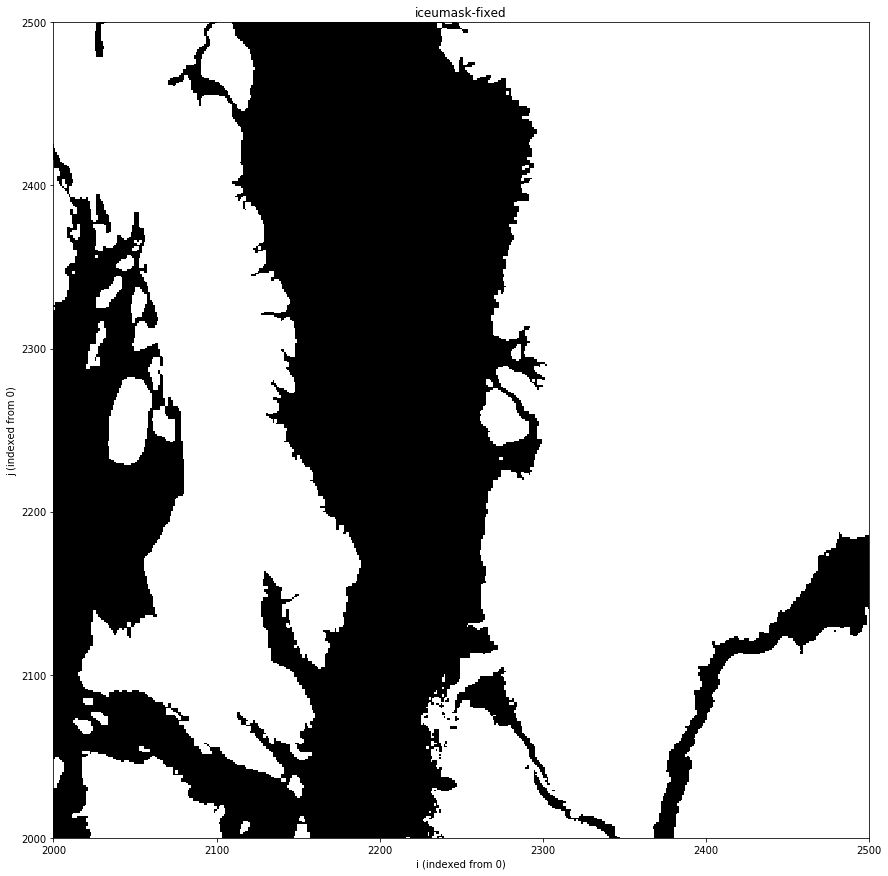

In [14]:
dset = nc.Dataset(cicerestartout,'r')
plt.figure(figsize=(15,15))
plt.imshow(dset[v], origin='lower', cmap=cm.binary)
plt.xlim(2000,2500)
plt.ylim(2000,2500)
plt.title(v+'-fixed')
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');
dset.close()

In [ ]:
# alter all variables in cicerestartout
if false:
    dset = nc.Dataset(cicerestartout,'r+')
    for v in dset.variables.keys():
        print(v, np.shape(dset[v]))
        if len(np.shape(dset[v]))==2:
            f = dset[v][:]
            if type(f)==bool:
                f[maskdiff] = False
            else:
                f[maskdiff] = 0.0  # wild guess as to appropriate value...
            dset[v][:] = f
        elif len(np.shape(dset[v]))==3:
            f = dset[v][0,:,:]
            if type(f)==bool:
                f[maskdiff] = False
            else:
                f[maskdiff] = 0.0  # wild guess as to appropriate value...
            dset[v][0,:,:] = f
    dset.close()  # write modified variables to cicerestartout

v = 'vvel'
plt.figure(figsize=(20,20))
plt.imshow(dset[v], origin='lower')
plt.title(v)
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');

### kmt file

In [13]:
kmtrestartin = '/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_spinup6/restart387/ice/kmt.nc'
kmtrestartout = kmtrestartin+'-fixed'
shutil.copy2(kmtrestartin, kmtrestartout)  # overwrites previous kmtrestartout (if any)

'/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_ryf8485_spinup6/restart387/ice/kmt.nc-fixed'

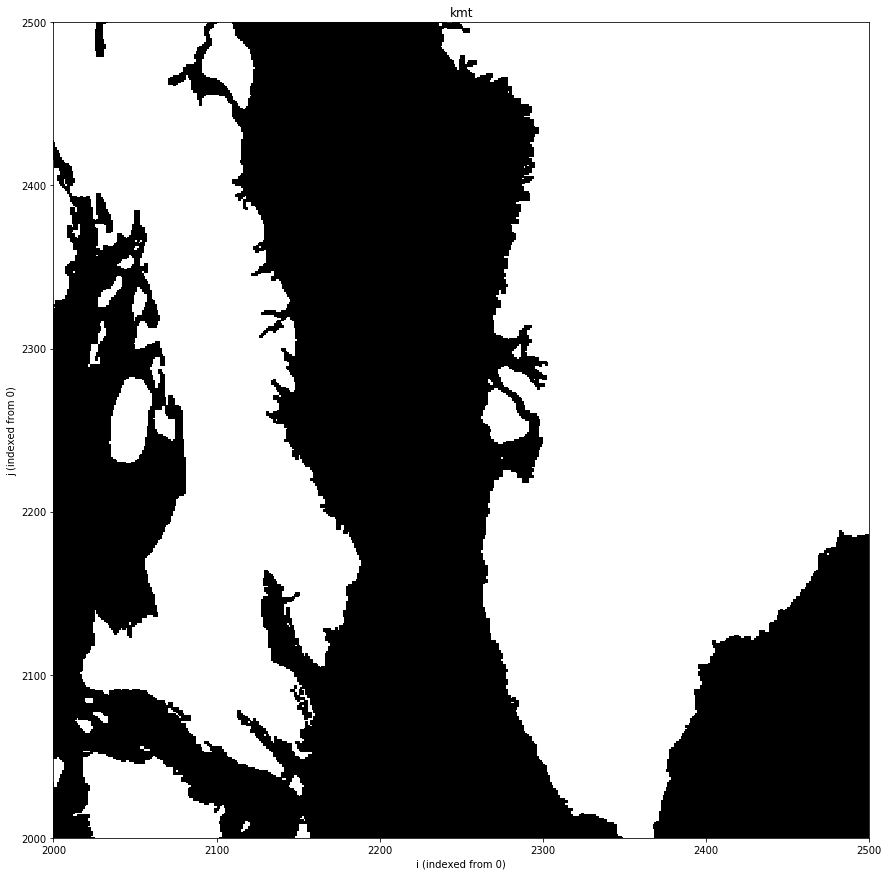

In [14]:
dset = nc.Dataset(kmtrestartout,'r')
v = 'kmt'
plt.figure(figsize=(15,15))
plt.imshow(dset[v], origin='lower', cmap=cm.binary)
plt.xlim(2000,2500)
plt.ylim(2000,2500)
plt.title(v)
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');
dset.close()

In [15]:
# alter ice mask in kmtrestartout
dset = nc.Dataset(kmtrestartout,'r+')
v = 'kmt'
f = dset[v][:]
f[maskdiff] = False
dset[v][:] = f
dset.close()  # write modified variable to kmtrestartout

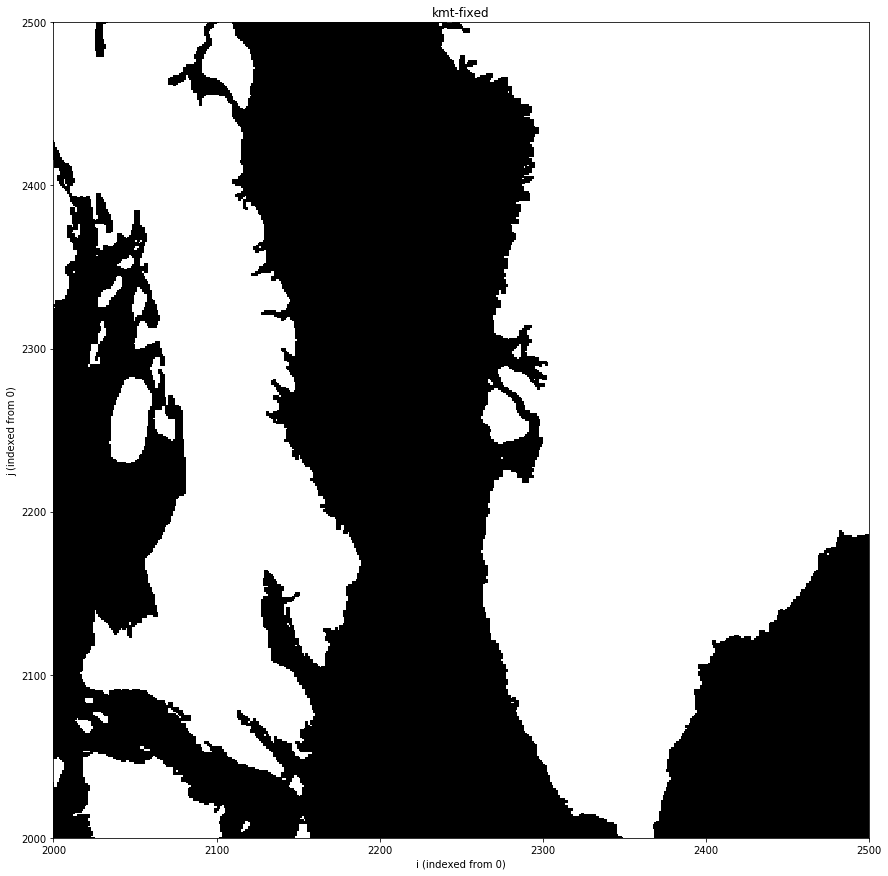

In [16]:
dset = nc.Dataset(kmtrestartout,'r')
v = 'kmt'
plt.figure(figsize=(15,15))
plt.imshow(dset[v], origin='lower', cmap=cm.binary)
plt.xlim(2000,2500)
plt.ylim(2000,2500)
plt.title(v+'-fixed')
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');
dset.close()

## fix MOM restarts

In [6]:
# from ocean_model_nml in ocean/input.nml
io_layout = (5, 5)

gridshape = np.shape(depth)  # NB: (y, x) order
tilex = int(np.round(gridshape[1]/io_layout[0]))  # tile x size
tiley = int(np.round(gridshape[0]/io_layout[1]))  # tile y size

In [7]:
jj,ii = np.nonzero(maskdiff)  # arrays of j, i coords where land mask has increased

xbox = (ii/tilex).astype(int)  # tile columns with land mask increases
ybox = (jj/tiley).astype(int)  # tile rows with land mask increases
tilenums = set(xbox+io_layout[0]*ybox)  # tiles with landmask increases (counting from 0)
tilenums

{17, 22, 24}

Use the tile numbers above to get the relevant MOM restart files, e.g.
```
cd github/aekiss/notebooks
scp -rp aek156@r-dm.nci.org.au:/short/v45/aek156/access-om2/control/01deg_jra55_ryf/archive/restart387/ocean/ocean_barotropic.res.nc.0017 .
scp -rp aek156@r-dm.nci.org.au:/short/v45/aek156/access-om2/control/01deg_jra55_ryf/archive/restart387/ocean/ocean_barotropic.res.nc.0022 .
scp -rp aek156@r-dm.nci.org.au:/short/v45/aek156/access-om2/control/01deg_jra55_ryf/archive/restart387/ocean/ocean_barotropic.res.nc.0024 .
```

tile 17
Fixing ocean_barotropic.res.nc.0017 eta_t; fixed version is ocean_barotropic.res.nc.0017-fixed
Fixing ocean_barotropic.res.nc.0017 eta_t_bar; fixed version is ocean_barotropic.res.nc.0017-fixed
tile 22
Fixing ocean_barotropic.res.nc.0022 eta_t; fixed version is ocean_barotropic.res.nc.0022-fixed
Fixing ocean_barotropic.res.nc.0022 eta_t_bar; fixed version is ocean_barotropic.res.nc.0022-fixed
tile 24
Fixing ocean_barotropic.res.nc.0024 eta_t; fixed version is ocean_barotropic.res.nc.0024-fixed
Fixing ocean_barotropic.res.nc.0024 eta_t_bar; fixed version is ocean_barotropic.res.nc.0024-fixed


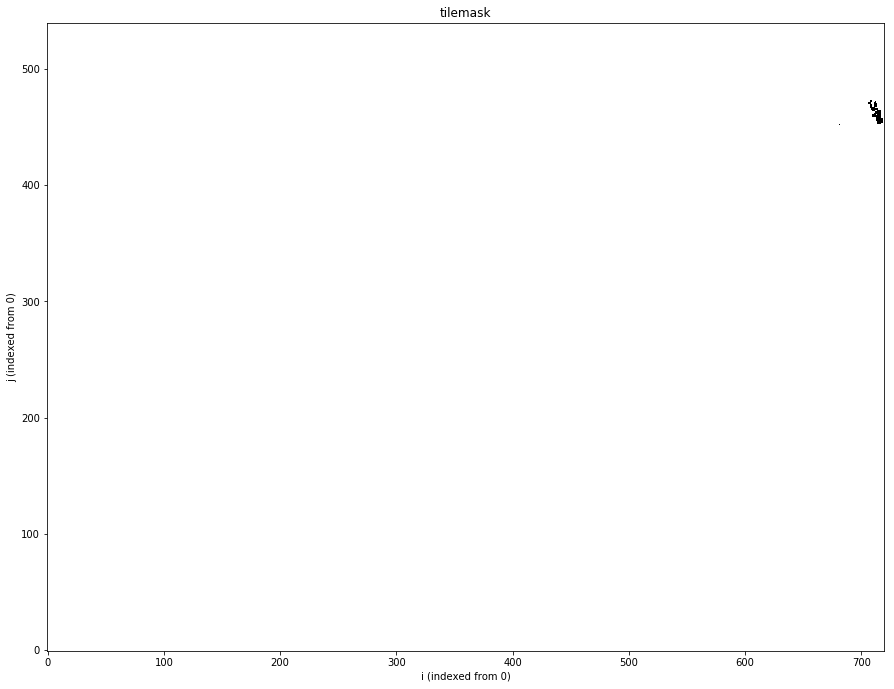

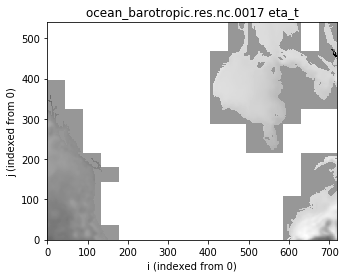

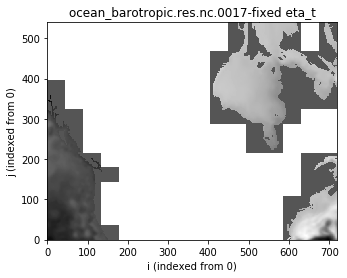

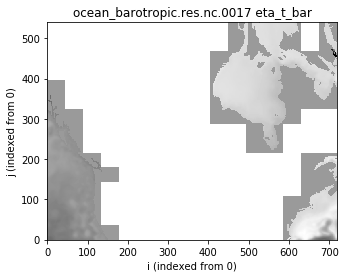

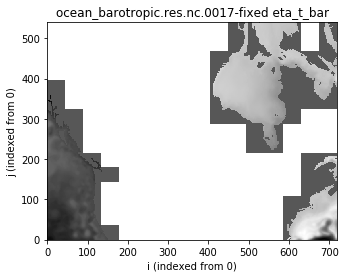

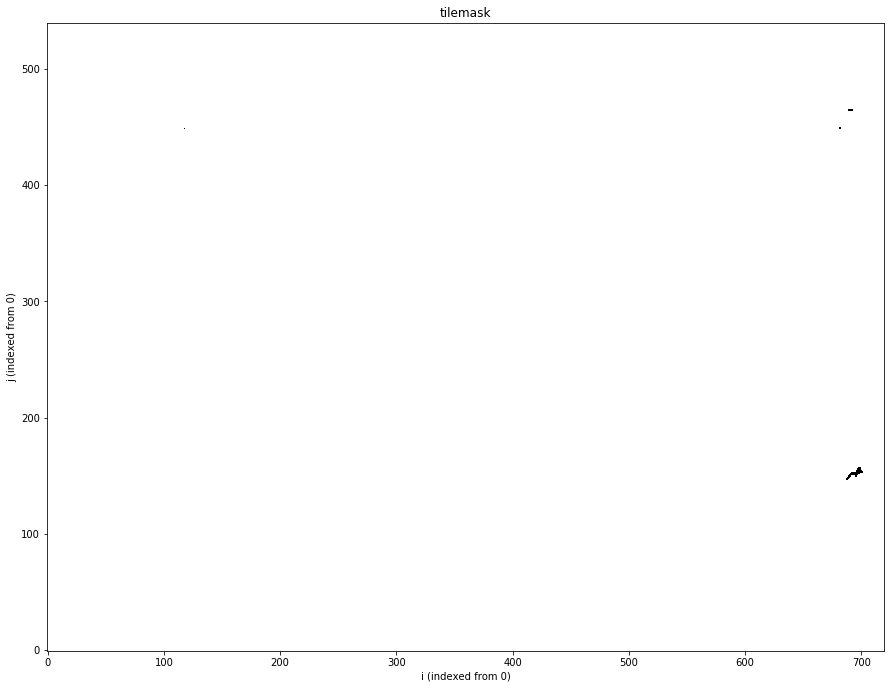

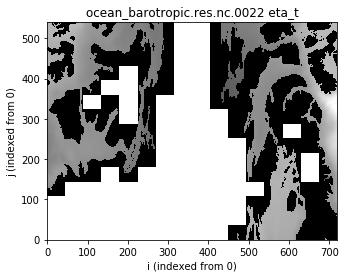

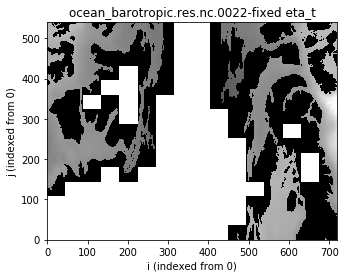

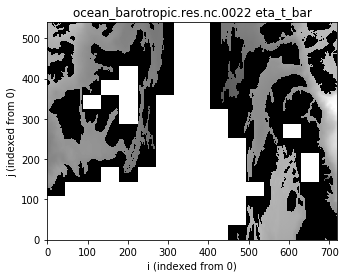

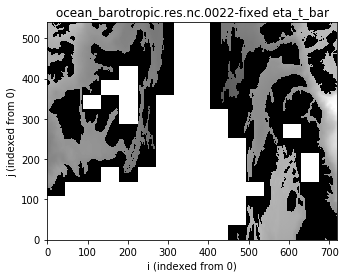

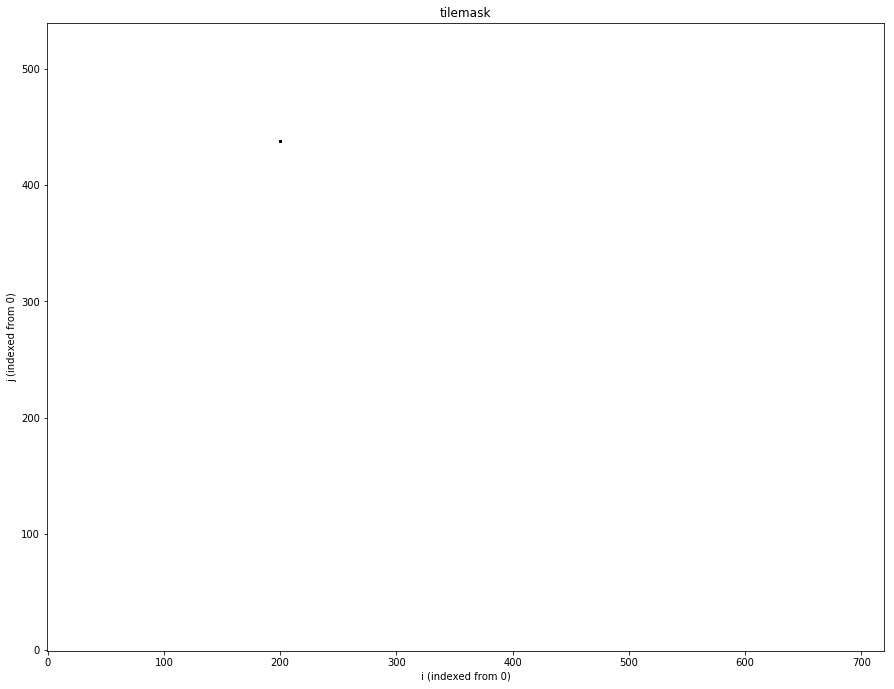

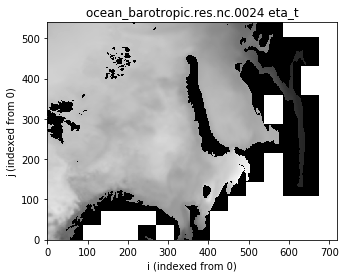

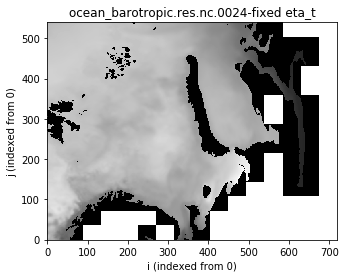

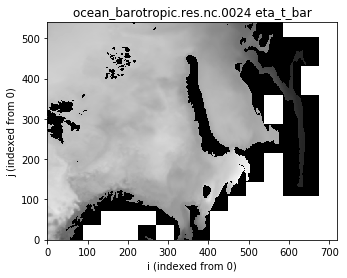

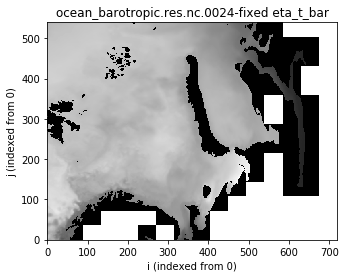

In [8]:
restartbase = 'ocean_barotropic.res.nc.'
varnames = ['eta_t', 'eta_t_bar']
for jtile in range(io_layout[1]):
    for itile in range(io_layout[0]):
        tilenum = itile+io_layout[0]*jtile
#         print(itile, jtile, tilenum)
        if tilenum in tilenums:
            print('tile '+str(tilenum))

            tilemask = maskdiff[jtile*tiley:(jtile+1)*tiley,itile*tilex:(itile+1)*tilex]
            plt.figure(figsize=(15,15))
            plt.imshow(tilemask, origin='lower', cmap=cm.binary)
            plt.title('tilemask')
            plt.xlabel('i (indexed from 0)')
            plt.ylabel('j (indexed from 0)');

            restartin = restartbase+str(tilenum).zfill(4)
            restartout = restartin+'-fixed'
            shutil.copy2(restartin, restartout)  # overwrites previous restartout (if any)
            
            for v in varnames:
                print('Fixing '+restartin+' '+v+'; fixed version is '+restartout)

                dset = nc.Dataset(restartout,'r+')
                plt.figure() #(figsize=(10,10))
                plt.imshow(dset[v][0,:,:], origin='lower', cmap=cm.binary)
                plt.title(restartin+' '+v)
                plt.xlabel('i (indexed from 0)')
                plt.ylabel('j (indexed from 0)');

                # set variable to zero at new land points 
                f = dset[v][0,:,:]
                f[tilemask] = 0.0
                dset[v][0,:,:] = f

                dset.close()  # write modified variable to restartout
                
                # now check restartout looks like it should
                dset = nc.Dataset(restartout,'r')
                plt.figure() #(figsize=(10,10))
                plt.imshow(dset[v][0,:,:], origin='lower', cmap=cm.binary)
                plt.title(restartout+' '+v)
                plt.xlabel('i (indexed from 0)')
                plt.ylabel('j (indexed from 0)');
                dset.close()
